In [32]:
import os, sys
sys.path.append('/home/kannawad/repo/')
from lsst.daf.persistence import Butler
import lsst.geom

In [1]:
pwd

'/lsstdata/user/staff/jhome/kannawad/GAaP_analysis/GAaP_analysis'

In [52]:
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np

In [3]:
butler = Butler('/datasets/hsc/repo/rerun/private/kannawad/RC2/w_2019_44_GAaP/')

In [42]:
dataId = {'tract':9701, 'patch':'4,4', 'filter':'HSC-I'}

In [13]:
[nam for nam in butler.getDatasetTypes() if ('oadd' in nam or 'atched' in nam) and not '_filename' in nam and '_meas' in nam]

['dcrCoadd_meas_len',
 'deepCoadd_measMatchFull_len',
 'dcrCoadd_measMatchFull_md',
 'deepCoadd_measMatch_len',
 'deepCoadd_measMatchFull_md',
 'deepCoadd_meas_schema_md',
 'dcrCoadd_measMatch_schema',
 'deepCoadd_measMatch_schema',
 'deepCoadd_measMatchFull',
 'deepCoadd_meas_schema_len',
 'deepCoadd_measMatch',
 'deepCoadd_measMatch_md',
 'dcrCoadd_measMatch',
 'deepCoadd_measMatchFull_schema',
 'deepCoadd_meas_schema',
 'deepCoadd_meas',
 'dcrCoadd_meas_schema',
 'dcrCoadd_measMatch_md',
 'dcrCoadd_meas_md',
 'dcrCoadd_measMatchFull',
 'dcrCoadd_meas',
 'deepCoadd_meas_len',
 'dcrCoadd_measMatchFull_len',
 'dcrCoadd_meas_schema_md',
 'dcrCoadd_measMatchFull_schema',
 'dcrCoadd_meas_schema_len',
 'dcrCoadd_measMatch_len',
 'deepCoadd_meas_md']

In [6]:
butler.get('deepCoadd_meas_filename', **dataId)

['/datasets/hsc/repo/rerun/private/kannawad/RC2/w_2019_44_GAaP/deepCoadd-results/HSC-I/9697/4,4/meas-HSC-I-9697-4,4.fits']

In [8]:
deepCoadd_meas = butler.get('deepCoadd_meas', **dataId)

In [10]:
deepCoadd_meas.asAstropy()

id,coord_ra,coord_dec,parent,merge_footprint_i2,merge_footprint_i,merge_footprint_r2,merge_footprint_r,merge_footprint_z,merge_footprint_y,merge_footprint_g,merge_footprint_N921,merge_footprint_N816,merge_footprint_N1010,merge_footprint_N387,merge_footprint_N515,merge_footprint_sky,merge_peak_i2,merge_peak_i,merge_peak_r2,merge_peak_r,merge_peak_z,merge_peak_y,merge_peak_g,merge_peak_N921,merge_peak_N816,merge_peak_N1010,merge_peak_N387,merge_peak_N515,merge_peak_sky,deblend_nChild,deblend_deblendedAsPsf,deblend_psfCenter_x,deblend_psfCenter_y,deblend_psf_instFlux,deblend_tooManyPeaks,deblend_parentTooBig,deblend_masked,deblend_skipped,deblend_rampedTemplate,deblend_patchedTemplate,deblend_hasStrayFlux,base_NaiveCentroid_x,base_NaiveCentroid_y,base_NaiveCentroid_flag,base_NaiveCentroid_flag_noCounts,base_NaiveCentroid_flag_edge,base_NaiveCentroid_flag_resetToPeak,base_SdssCentroid_x,slot_Centroid_x,base_SdssCentroid_y,slot_Centroid_y,base_SdssCentroid_xErr,slot_Centroid_xErr,base_SdssCentroid_yErr,slot_Centroid_yErr,base_SdssCentroid_flag,base_CircularApertureFlux_flag_badCentroid,base_GaussianFlux_flag_badCentroid,base_InputCount_flag_badCentroid,base_LocalBackground_flag_badCentroid,base_NaiveCentroid_flag_badInitialCentroid,base_PsfFlux_flag_badCentroid,base_SdssShape_flag_badCentroid,base_Variance_flag_badCentroid,ext_convolved_ConvolvedFlux_0_flag_badCentroid,ext_convolved_ConvolvedFlux_1_flag_badCentroid,ext_convolved_ConvolvedFlux_2_flag_badCentroid,ext_convolved_ConvolvedFlux_3_flag_badCentroid,ext_convolved_ConvolvedFlux_flag_badCentroid,ext_photometryKron_KronFlux_flag_badInitialCentroid,ext_shapeHSM_HsmPsfMoments_flag_badCentroid,ext_shapeHSM_HsmShapeRegauss_flag_badCentroid,ext_shapeHSM_HsmSourceMomentsRound_flag_badCentroid,ext_shapeHSM_HsmSourceMoments_flag_badCentroid,modelfit_DoubleShapeletPsfApprox_flag_badCentroid,slot_Centroid_flag,base_SdssCentroid_flag_edge,base_CircularApertureFlux_flag_badCentroid_edge,base_GaussianFlux_flag_badCentroid_edge,base_InputCount_flag_badCentroid_edge,base_LocalBackground_flag_badCentroid_edge,base_NaiveCentroid_flag_badInitialCentroid_edge,base_PsfFlux_flag_badCentroid_edge,base_SdssShape_flag_badCentroid_edge,base_Variance_flag_badCentroid_edge,ext_convolved_ConvolvedFlux_0_flag_badCentroid_edge,ext_convolved_ConvolvedFlux_1_flag_badCentroid_edge,ext_convolved_ConvolvedFlux_2_flag_badCentroid_edge,ext_convolved_ConvolvedFlux_3_flag_badCentroid_edge,ext_convolved_ConvolvedFlux_flag_badCentroid_edge,ext_photometryKron_KronFlux_flag_badInitialCentroid_edge,ext_shapeHSM_HsmPsfMoments_flag_badCentroid_edge,ext_shapeHSM_HsmShapeRegauss_flag_badCentroid_edge,ext_shapeHSM_HsmSourceMomentsRound_flag_badCentroid_edge,ext_shapeHSM_HsmSourceMoments_flag_badCentroid_edge,modelfit_DoubleShapeletPsfApprox_flag_badCentroid_edge,slot_Centroid_flag_edge,base_SdssCentroid_flag_noSecondDerivative,base_CircularApertureFlux_flag_badCentroid_noSecondDerivative,base_GaussianFlux_flag_badCentroid_noSecondDerivative,base_InputCount_flag_badCentroid_noSecondDerivative,base_LocalBackground_flag_badCentroid_noSecondDerivative,base_NaiveCentroid_flag_badInitialCentroid_noSecondDerivative,base_PsfFlux_flag_badCentroid_noSecondDerivative,base_SdssShape_flag_badCentroid_noSecondDerivative,base_Variance_flag_badCentroid_noSecondDerivative,ext_convolved_ConvolvedFlux_0_flag_badCentroid_noSecondDerivative,ext_convolved_ConvolvedFlux_1_flag_badCentroid_noSecondDerivative,ext_convolved_ConvolvedFlux_2_flag_badCentroid_noSecondDerivative,ext_convolved_ConvolvedFlux_3_flag_badCentroid_noSecondDerivative,ext_convolved_ConvolvedFlux_flag_badCentroid_noSecondDerivative,ext_photometryKron_KronFlux_flag_badInitialCentroid_noSecondDerivative,ext_shapeHSM_HsmPsfMoments_flag_badCentroid_noSecondDerivative,ext_shapeHSM_HsmShapeRegauss_flag_badCentroid_noSecondDerivative,ext_shapeHSM_HsmSourceMomentsRound_flag_badCentroid_noSecondDerivative,ext_shapeHSM_HsmSourceMoments_flag_badCentroid_noSecondDerivative,modelfit_DoubleSha

In [43]:
psfMatchedCoadd = butler.get('deepCoadd', **dataId)

In [44]:
coaddPsf = psfMatchedCoadd.getPsf()
print(psfMatchedCoadd.getBBox())

(minimum=(15900, 15900), maximum=(20099, 20099))


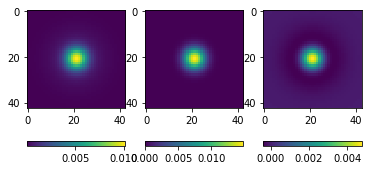

In [70]:
fig, ax = plt.subplots(1,3)
image = coaddPsf.computeImage(lsst.geom.Point2D(18000.,18000.))
_im = ax[0].imshow(image.array)
fig.colorbar(_im, ax=ax[0],orientation='horizontal')
X, Y = np.meshgrid(np.linspace(-21,21,43), np.linspace(-21,21,43))
gauss = np.exp(-0.5*(X**2+Y**2)/coaddPsf.getSigma1()**2)
gauss = gauss/gauss.sum()
_im = ax[1].imshow(gauss)
fig.colorbar(_im,ax=ax[1],orientation='horizontal')
_im = ax[2].imshow(gauss-image.array)
fig.colorbar(_im, ax=ax[2], orientation='horizontal')

In [71]:
gauss.max(), image.array.max()

(0.014885181323715833, 0.010142123081726438)

In [58]:
grid

list